In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report


from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("df.csv")
df_1 = pd.read_csv("df_1.csv")
df_1.head()

,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,98.0,52.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,195.0,...,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.0,24.0,0.0
1,100.0,100.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,150.0,...,9.0,9.0,10.0,9.0,10.0,9.0,0.0,0.0,1.0,0.0
2,97.0,100.0,0.0,0.0,6.0,1.0,2.0,3.0,0.0,140.0,...,8.0,8.0,9.0,9.0,9.0,9.0,0.0,0.0,3.0,1.0
3,92.0,100.0,0.0,0.0,3.0,1.0,1.0,2.0,0.0,110.0,...,9.0,8.0,8.0,8.0,9.0,9.0,0.0,1.0,4.0,4.0
4,100.0,75.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,119.0,...,9.0,9.0,10.0,10.0,8.0,9.0,0.0,2.0,3.0,0.0


In [3]:
df.head()

,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,98.0,52.0,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,195.0,...,10.0,10.0,10.0,10.0,10.0,8.0,f,strict,23.628936,0.18
1,100.0,100.0,Apartment,Entire home/apt,2.0,1.5,1.0,1.0,Real Bed,150.0,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,1.000000,0.41
2,97.0,100.0,Apartment,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,140.0,...,8.0,8.0,9.0,9.0,9.0,9.0,f,strict,3.000000,1.09
3,92.0,100.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,110.0,...,9.0,8.0,8.0,8.0,9.0,9.0,f,flexible,4.000000,4.34
4,100.0,75.0,House,Private room,2.0,1.0,1.0,1.0,Pull-out Sofa,119.0,...,9.0,9.0,10.0,10.0,8.0,9.0,f,moderate,3.000000,0.09


In [4]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [6]:
df_1.groupby('room_type').aggregate({'mean'})

,host_response_rate,host_acceptance_rate,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
room_type,,,,,,,,,,,,,,,,,,,,,
0.0,91.380810,85.405640,0.407520,3.792175,1.283503,1.464685,1.866565,0.035569,174.811484,68.883503,...,9.582690,9.367869,9.727608,9.767192,9.482232,9.356589,0.101626,1.016768,3.069106,1.497375
1.0,91.793257,87.361065,0.901452,2.010373,1.216874,1.000000,1.137586,0.137967,91.808091,36.958714,...,9.534924,9.297822,9.746957,9.794398,9.290837,9.353458,0.112033,0.978216,2.774896,1.779910
2.0,89.327984,84.398354,0.617284,2.777778,1.123457,1.000000,1.631687,0.962963,78.049383,29.479424,...,9.444033,9.188889,9.655556,9.805350,9.583539,9.380247,0.098765,1.061728,1.925926,1.738683


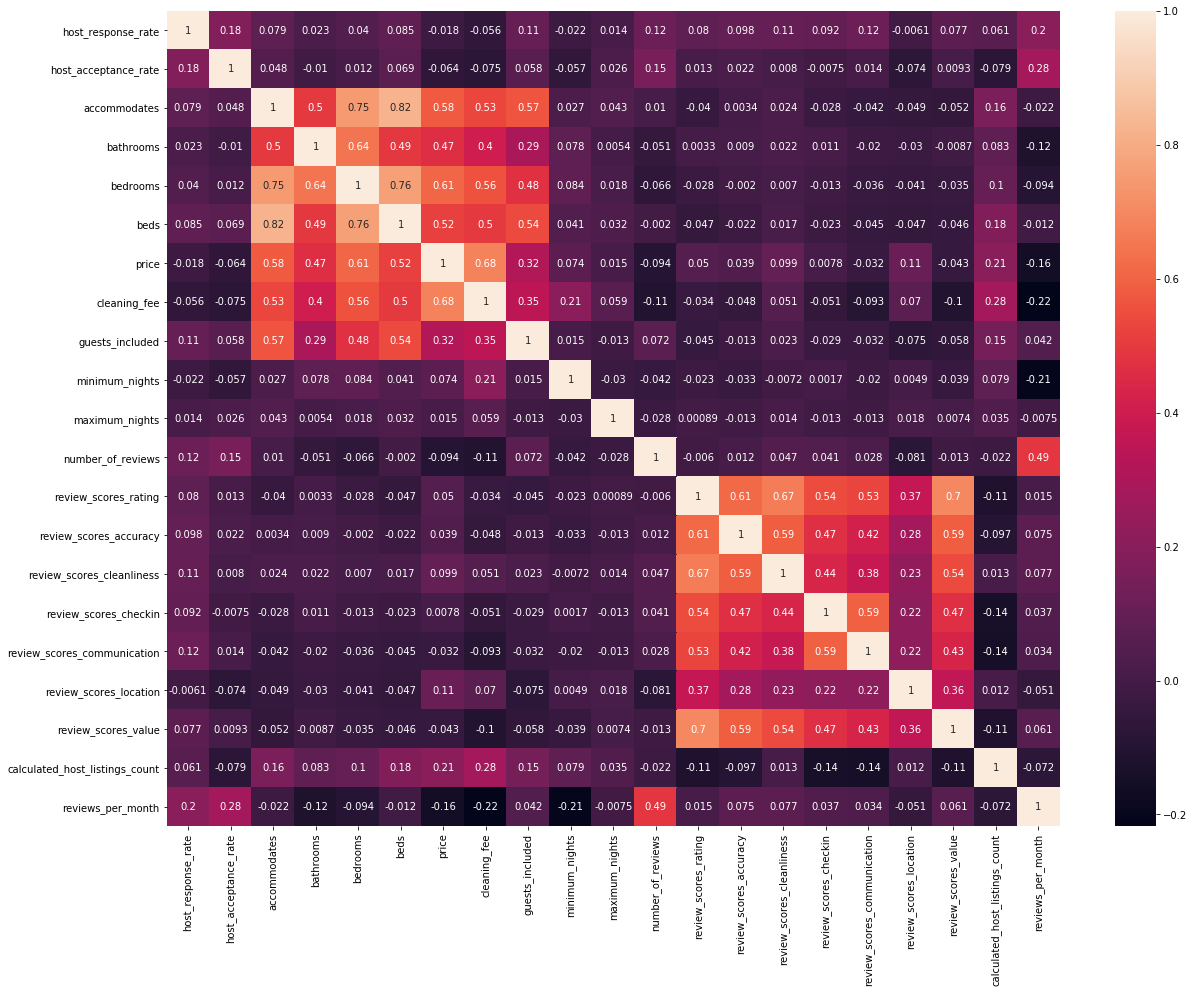

In [7]:
corrmat = df_1[df._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [3]:
def num_logarithm(df):
    for col_names in list(df.columns):
        df[col_names] = df[col_names].apply(lambda y: np.log(y) if y > 0 else y)
    return df
df_1[df._get_numeric_data().columns] = num_logarithm(df_1[df._get_numeric_data().columns])

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


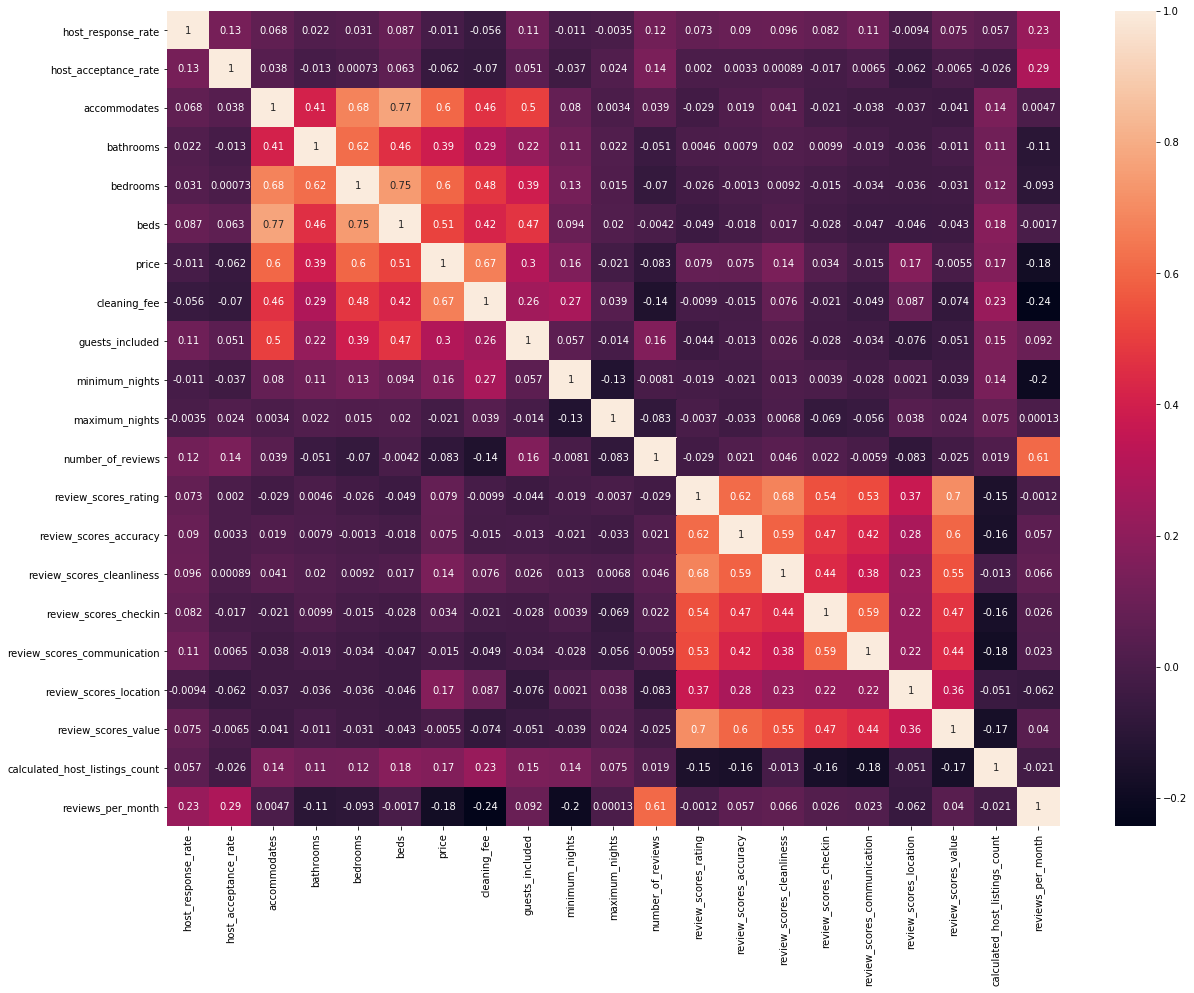

In [9]:
corrmat = df_1[df._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [4]:
test, train = train_test_split(df_1, test_size=0.8, random_state=0)
X_train = train.drop('room_type', axis=1)
X_test = test.drop('room_type', axis=1)
y_train = train.room_type
y_test = test.room_type

In [5]:
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
X_train = pd.DataFrame(X_train, columns=train.drop('room_type', axis=1).columns)
X_test = pd.DataFrame(X_test, columns=test.drop('room_type', axis=1).columns)

In [8]:
X_train_2_var = X_train[['price', 'cleaning_fee']]
X_test_2_var = X_test[['price', 'cleaning_fee']]
# Модель логистической регрессии с 2 переменными
slr = LogisticRegression(random_state = 10).fit(X_train_2_var, y_train)
slr_y_pred = slr.predict(X_test_2_var)
print(classification_report(y_test, slr_y_pred, target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.82      0.88      0.85       399
   Private room       0.65      0.60      0.62       186
    Shared room       0.00      0.00      0.00        17

       accuracy                           0.77       602
      macro avg       0.49      0.49      0.49       602
   weighted avg       0.74      0.77      0.76       602



H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
print(classification_report(y_train, slr.predict(X_train_2_var), target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.81      0.90      0.85      1569
   Private room       0.68      0.58      0.63       778
    Shared room       1.00      0.02      0.03        64

       accuracy                           0.77      2411
      macro avg       0.83      0.50      0.50      2411
   weighted avg       0.77      0.77      0.76      2411



In [11]:
cm = confusion_matrix(y_test, slr_y_pred)
print(cm)

[[353  46   0]
 [ 75 111   0]
 [  2  15   0]]


In [9]:
lr = LogisticRegression(random_state = 10).fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print(classification_report(y_test, lr_y_pred, target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.88      0.90      0.89       399
   Private room       0.75      0.75      0.75       186
    Shared room       0.50      0.24      0.32        17

       accuracy                           0.84       602
      macro avg       0.71      0.63      0.65       602
   weighted avg       0.83      0.84      0.83       602



In [10]:
print(classification_report(y_train, lr.predict(X_train), target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.89      0.92      0.90      1569
   Private room       0.78      0.77      0.78       778
    Shared room       0.64      0.22      0.33        64

       accuracy                           0.85      2411
      macro avg       0.77      0.64      0.67      2411
   weighted avg       0.85      0.85      0.85      2411



In [12]:
cm = confusion_matrix(y_test, lr_y_pred)
print(cm)

[[361  36   2]
 [ 45 139   2]
 [  2  11   4]]


Minimum error:- 0.1760797342192691 at K = 33


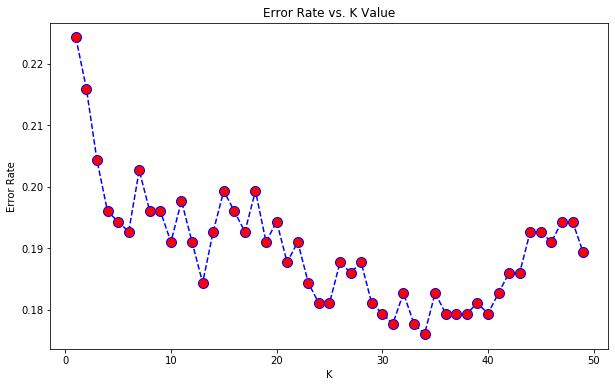

In [13]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [15]:
# Модель КNN с 33 ближайшими соседями
knn = KNeighborsClassifier(n_neighbors = 33, metric = 'minkowski', p = 2).fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
print(classification_report(y_test, knn_y_pred, target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.85      0.92      0.89       399
   Private room       0.74      0.68      0.71       186
    Shared room       0.00      0.00      0.00        17

       accuracy                           0.82       602
      macro avg       0.53      0.54      0.53       602
   weighted avg       0.80      0.82      0.81       602



H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(classification_report(y_train, knn.predict(X_train), target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.83      0.94      0.88      1569
   Private room       0.78      0.64      0.70       778
    Shared room       0.00      0.00      0.00        64

       accuracy                           0.82      2411
      macro avg       0.54      0.53      0.53      2411
   weighted avg       0.79      0.82      0.80      2411



H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
cm = confusion_matrix(y_test, knn_y_pred)
print(cm)

[[368  31   0]
 [ 59 127   0]
 [  4  13   0]]


In [20]:
# Модель SVM с радиально-базисным ядром
svm = SVC(kernel = 'rbf', random_state = 10).fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
print(classification_report(y_test, svm_y_pred, target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.89      0.92      0.90       399
   Private room       0.76      0.77      0.77       186
    Shared room       1.00      0.12      0.21        17

       accuracy                           0.85       602
      macro avg       0.88      0.60      0.63       602
   weighted avg       0.85      0.85      0.84       602



In [19]:
print(classification_report(y_train, svm.predict(X_train), target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.92      0.96      0.94      1569
   Private room       0.86      0.85      0.85       778
    Shared room       1.00      0.20      0.34        64

       accuracy                           0.90      2411
      macro avg       0.93      0.67      0.71      2411
   weighted avg       0.90      0.90      0.90      2411



In [21]:
cm = confusion_matrix(y_test, svm_y_pred)
print(cm)

[[366  33   0]
 [ 42 144   0]
 [  2  13   2]]


In [24]:
# Модель Наивного Байеса
nb = GaussianNB().fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
print(classification_report(y_test, nb_y_pred, target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.98      0.36      0.52       399
   Private room       0.41      0.92      0.57       186
    Shared room       0.25      0.53      0.34        17

       accuracy                           0.54       602
      macro avg       0.55      0.60      0.48       602
   weighted avg       0.78      0.54      0.53       602



In [23]:
print(classification_report(y_train, nb.predict(X_train), target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.98      0.38      0.54      1569
   Private room       0.43      0.92      0.59       778
    Shared room       0.22      0.50      0.30        64

       accuracy                           0.55      2411
      macro avg       0.54      0.60      0.48      2411
   weighted avg       0.78      0.55      0.55      2411



In [25]:
cm = confusion_matrix(y_test, nb_y_pred)
print(cm)

[[142 241  16]
 [  3 172  11]
 [  0   8   9]]


In [37]:
# Модель дерева решений со всеми переменными
ct = DecisionTreeClassifier(max_leaf_nodes = 25, criterion = 'entropy', random_state=10).fit(X_train, y_train)
ct_y_pred = ct.predict(X_test)
print(classification_report(y_test, ct_y_pred, target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.88      0.93      0.90       399
   Private room       0.82      0.72      0.77       186
    Shared room       0.47      0.47      0.47        17

       accuracy                           0.85       602
      macro avg       0.72      0.71      0.71       602
   weighted avg       0.85      0.85      0.85       602



In [38]:
print(classification_report(y_train, ct.predict(X_train), target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.89      0.94      0.91      1569
   Private room       0.84      0.74      0.79       778
    Shared room       0.67      0.48      0.56        64

       accuracy                           0.87      2411
      macro avg       0.80      0.72      0.76      2411
   weighted avg       0.86      0.87      0.86      2411



In [39]:
ct_cm = confusion_matrix(y_test, ct_y_pred)
print(ct_cm)

[[370  24   5]
 [ 48 134   4]
 [  4   5   8]]


In [49]:
rf = RandomForestClassifier(n_estimators=17, max_leaf_nodes=25, random_state=10).fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print(classification_report(y_test, rf.predict(X_test), target_names=['Entire home/apt', 'Private room', 'Shared room']))

                 precision    recall  f1-score   support

Entire home/apt       0.89      0.92      0.90       399
   Private room       0.75      0.77      0.76       186
    Shared room       1.00      0.06      0.11        17

       accuracy                           0.85       602
      macro avg       0.88      0.58      0.59       602
   weighted avg       0.85      0.85      0.84       602



In [73]:
cm = confusion_matrix(y_test, rf_y_pred)
print(cm)

[[367  32   0]
 [ 59 127   0]
 [  3  14   0]]
